<a href="https://colab.research.google.com/github/garfield-gray/MachineLearning/blob/main/pytorch/2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    ) # keep random state so we get the same values

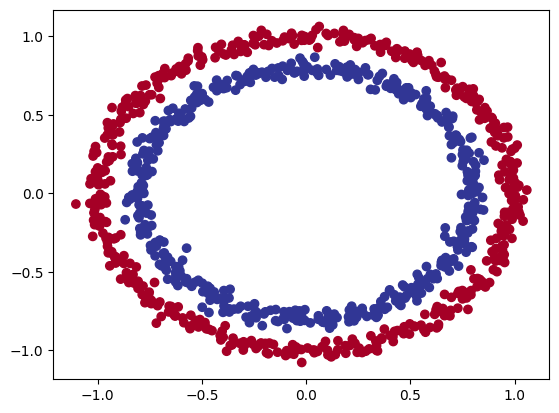

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [7]:
# prompt: turn X and y into torch.tensor format and split them into train and test

import torch
from sklearn.model_selection import train_test_split

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
# Replicate CircleModelV0 with nn.Sequential
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
model_0 = nn.Sequential(

    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6318, -0.3278],
                      [-0.2603, -0.2549],
                      [ 0.3357,  0.4400],
                      [-0.2145, -0.1988],
                      [-0.2441, -0.5798]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5986,  0.5747, -0.4957, -0.0749, -0.1581], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2023, -0.3974, -0.4041, -0.0121,  0.4285]], device='cuda:0')),
             ('1.bias', tensor([-0.0096], device='cuda:0'))])

In [9]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2281, -0.2496],
                      [ 0.4902, -0.0278],
                      [-0.0365, -0.4452],
                      [ 0.4631,  0.2589],
                      [-0.0988,  0.6135]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.0584, -0.0790,  0.1076, -0.3209,  0.0851], device='cuda:0')),
             ('layer_2.weight',
              tensor([[0.2501, 0.0717, 0.2305, 0.3781, 0.0181]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.1841], device='cuda:0'))])

In [10]:
# the digital playground thing for neural network is amaizing:)

In [11]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.1)

In [12]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [13]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1672],
        [-0.2534],
        [-0.2370],
        [-0.3963],
        [-0.1836]], device='cuda:0', grad_fn=<SliceBackward0>)

In [14]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4583],
        [0.4370],
        [0.4410],
        [0.4022],
        [0.4542]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [15]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [16]:
__doc__

'Automatically created module for IPython interactive environment'

In [17]:
l = dir()

In [18]:
print(l)

['CircleModelV0', 'In', 'Out', 'X', 'X_test', 'X_train', '_', '_13', '_14', '_15', '_16', '_4', '_8', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'accuracy_fn', 'device', 'exit', 'get_ipython', 'loss_fn', 'make_circles', 'model_0', 'n_samples', 'nn', 'optimizer', 'plt', 'quit', 'torch', 'train_test_split', 'y', 'y_logits', 'y_pred_labels', 'y_pred_probs', 'y_preds', 'y_test', 'y_train']


In [19]:
__builtins__

<module 'builtins' (built-in)>

In [20]:
for i,j in zip(dir(), range(len(l))):
    print(j,i)

0 CircleModelV0
1 In
2 Out
3 X
4 X_test
5 X_train
6 _
7 _13
8 _14
9 _15
10 _16
11 _19
12 _4
13 _8
14 _9
15 __
16 ___
17 __builtin__
18 __builtins__
19 __doc__
20 __loader__
21 __name__
22 __package__
23 __spec__
24 _dh
25 _i
26 _i1
27 _i10
28 _i11
29 _i12
30 _i13
31 _i14
32 _i15
33 _i16
34 _i17
35 _i18
36 _i19
37 _i2
38 _i20
39 _i3
40 _i4
41 _i5
42 _i6
43 _i7
44 _i8
45 _i9
46 _ih
47 _ii
48 _iii
49 _oh
50 accuracy_fn
51 device
52 exit
53 get_ipython
54 l
55 loss_fn
56 make_circles
57 model_0
58 n_samples
59 nn
60 optimizer
61 plt
62 quit
63 torch
64 train_test_split
65 y
66 y_logits


In [21]:
# dir(), globals(), locals() five you the spection that you want!

In [22]:
y_test[:10]

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.]])

In [23]:
torch.round(torch.sigmoid(model_0(X_test[:10].to(device))))

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [24]:
# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [26]:

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy

    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train.squeeze())
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test.squeeze())
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69352, Accuracy: 40621.25% | Test loss: 0.69150, Test acc: 10700.00%
Epoch: 10 | Loss: 0.69353, Accuracy: 39300.00% | Test loss: 0.69323, Test acc: 10245.00%
Epoch: 20 | Loss: 0.69284, Accuracy: 40061.25% | Test loss: 0.69613, Test acc: 9888.00%
Epoch: 30 | Loss: 0.69279, Accuracy: 40178.50% | Test loss: 0.69647, Test acc: 9839.00%
Epoch: 40 | Loss: 0.69275, Accuracy: 40262.50% | Test loss: 0.69606, Test acc: 9748.00%
Epoch: 50 | Loss: 0.69274, Accuracy: 40211.75% | Test loss: 0.69687, Test acc: 9825.00%
Epoch: 60 | Loss: 0.69274, Accuracy: 40295.75% | Test loss: 0.69644, Test acc: 9741.00%
Epoch: 70 | Loss: 0.69274, Accuracy: 40246.75% | Test loss: 0.69665, Test acc: 9762.00%
Epoch: 80 | Loss: 0.69274, Accuracy: 40248.50% | Test loss: 0.69674, Test acc: 9762.00%
Epoch: 90 | Loss: 0.69274, Accuracy: 40260.75% | Test loss: 0.69671, Test acc: 9741.00%


In [27]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

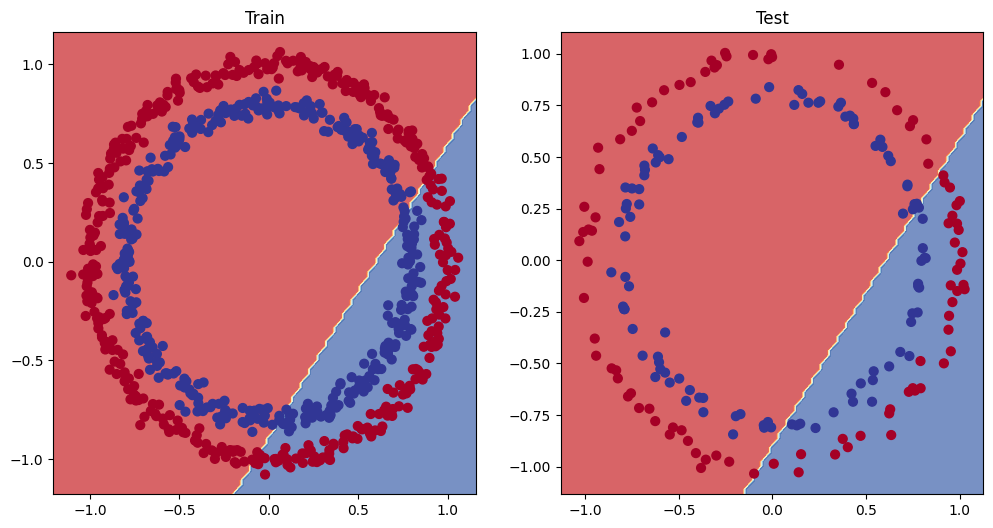

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)